## Reddit API


In [1]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import praw
# API documentation: https://praw.readthedocs.io/en/stable/
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# log in to App
reddit = praw.Reddit(client_id='FBNNseM9ko6_O02J1T5W2w', 
                     client_secret='CX4ZiswDMSnssxWRztIN5UYLRjMjjA', 
                     user_agent='Webscrapping')

In [3]:
# getting the hot submissions from bitcoin subreddit

headlines = set() # cretaed a set to avoid repetition

for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

778


In [4]:
# cast reddit posts into a pandas dataframe
df = pd.DataFrame(headlines)
df.head(100)

,0
0,"A Bitcoin Is Worth $4,000--Why You Probably Sh..."
1,Billionaire Orlando Bravo Says He’s ‘Very Bull...
2,How to connect your Trezor to your Umbrel Node...
3,Please can someone explain how schnorr signatu...
4,Pruning Node and lite nodes
...,...
95,Is Chivo the only allowed wallet in El Salvador?
96,Anyone knows why Samourai wallet is not recomm...
97,This is the power of Bitcoin
98,What makes Bitcoin special?


In [ ]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features

head_list = pd.DataFrame(headlines)
head_list['text'] = head_list[0]

#Removing RT, Punctuation etc

remove_rt = lambda x: re.sub('RT @\w+: ', " ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|(['#'])|(RT[s]+)|([https?:\/\/\S+])","",x)
head_list["text"] = head_list.text.map(remove_rt).map(rt)
head_list["text"] = head_list.text.str.lower()
head_list.head(100)

In [5]:
# save reddit dataframe to a csv format
df.to_csv("reddit_headlines.csv", header=False, encoding='utf-8', index=False)

In [6]:
df

,0
0,"A Bitcoin Is Worth $4,000--Why You Probably Sh..."
1,Billionaire Orlando Bravo Says He’s ‘Very Bull...
2,How to connect your Trezor to your Umbrel Node...
3,Please can someone explain how schnorr signatu...
4,Pruning Node and lite nodes
...,...
773,Today We Get the FOMO Buyers Who Will Cry When...
774,El Salvador officially starts volcano-powered ...
775,"“Buy bitcoin before its too late, you wont be ..."
776,Reuters - Marketmind: One coin to rule them all


In [7]:
# label headlines with nltk library and vader_lexicon
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ronal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
# Sentiment analysis for each headline
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line) # ->dict
    pol_score['headline'] = line
    results.append(pol_score)
    
pprint(results[:5], width = 100)    

[{'compound': 0.2263,
  'headline': 'A Bitcoin Is Worth $4,000--Why You Probably Should Not Own One',
  'neg': 0.0,
  'neu': 0.826,
  'pos': 0.174},
 {'compound': 0.0,
  'headline': 'Billionaire Orlando Bravo Says He’s ‘Very Bullish’ on Bitcoin',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'How to connect your Trezor to your Umbrel Node using Sparrow Wallet - a short 2 '
              'minute video.',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.3182,
  'headline': 'Please can someone explain how schnorr signatures work without going into maths I '
              "don't understand?",
  'neg': 0.0,
  'neu': 0.85,
  'pos': 0.15},
 {'compound': 0.0, 'headline': 'Pruning Node and lite nodes', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}]


In [9]:
# cast the sentiment analysis results into a dataframe
df = pd.DataFrame.from_records(results)
df.head(10)

,neg,neu,pos,compound,headline
0,0.000,0.826,0.174,0.2263,"A Bitcoin Is Worth $4,000--Why You Probably Sh..."
1,0.000,1.000,0.000,0.0000,Billionaire Orlando Bravo Says He’s ‘Very Bull...
2,0.000,1.000,0.000,0.0000,How to connect your Trezor to your Umbrel Node...
3,0.000,0.850,0.150,0.3182,Please can someone explain how schnorr signatu...
4,0.000,1.000,0.000,0.0000,Pruning Node and lite nodes
5,0.000,0.813,0.187,0.3182,"Patrick Byrne: ""Bitcoin Gives Us A Version Of ..."
6,0.291,0.709,0.000,-0.5092,"After all this FUD, what is NEXT for bitcoin?"
7,0.000,1.000,0.000,0.0000,Michael Saylor's arbitrage plan: borrow agains...
8,0.359,0.641,0.000,-0.6679,Why buy shit when u can have the bit !!!
9,0.000,1.000,0.000,0.0000,Blockchain not letting me send BTC or anything


In [10]:
# create a new column called label

df["label"] = 0
df.loc[df["compound"] > 0.2, "label"] = 1
df.loc[df["compound"] < -0.2, "label"] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.0,0.826,0.174,0.2263,"A Bitcoin Is Worth $4,000--Why You Probably Sh...",1
1,0.0,1.000,0.000,0.0000,Billionaire Orlando Bravo Says He’s ‘Very Bull...,0
2,0.0,1.000,0.000,0.0000,How to connect your Trezor to your Umbrel Node...,0
3,0.0,0.850,0.150,0.3182,Please can someone explain how schnorr signatu...,1
4,0.0,1.000,0.000,0.0000,Pruning Node and lite nodes,0


In [11]:
# create a new dataframe only with headlines and labels
df2 = df[['headline', 'label']]

In [12]:
# save to csv the newly created dataframe
df2.to_csv('reddit_headlines_labels.csv', encoding = 'utf-8', index = False)

In [13]:
df.label.value_counts()

 0    441
 1    211
-1    126
Name: label, dtype: int64

In [14]:
# percentage of value counts
df.label.value_counts(normalize = True) *100

 0    56.683805
 1    27.120823
-1    16.195373
Name: label, dtype: float64

In [15]:
# print positive and negative headlines
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width = 200)

print("Negative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width = 200)

Positive headlines:

['A Bitcoin Is Worth $4,000--Why You Probably Should Not Own One',
 "Please can someone explain how schnorr signatures work without going into maths I don't understand?",
 'Patrick Byrne: "Bitcoin Gives Us A Version Of Truth Authoritarians Cannot Distort."',
 "Don't be fooled by the CCP, they are",
 'Bitcoin has unleashed a wave of speculation and increase popularity!']
Negative headlines:

['After all this FUD, what is NEXT for bitcoin?',
 'Why buy shit when u can have the bit !!!',
 'When Bitcoin hits 45K next it will not go under 42K until it reaches over 65K (the bull run is back on baby). If I’m wrong the first person to call me out in this post gets 100AU/sats. FACT',
 'Aang was 12 when he fought Fire lord Ozai. The story of power, manipulation, and greed that came to an end. Bitcoin is 12 and fighting the FED lords...',
 'The idea of depriving government altogether of its age-old prerogative of monopolising money is still too unfamiliar and even alarming to 

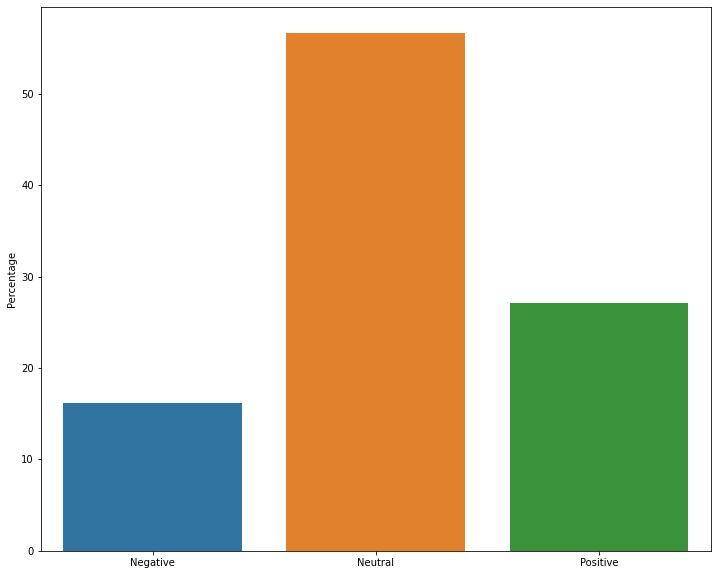

In [16]:
fig, ax = plt.subplots(figsize = (12, 10))
counts = df.label.value_counts(normalize=True) * 100
sns.barplot(x = counts.index, y = counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

In [17]:
df

,neg,neu,pos,compound,headline,label
0,0.000,0.826,0.174,0.2263,"A Bitcoin Is Worth $4,000--Why You Probably Sh...",1
1,0.000,1.000,0.000,0.0000,Billionaire Orlando Bravo Says He’s ‘Very Bull...,0
2,0.000,1.000,0.000,0.0000,How to connect your Trezor to your Umbrel Node...,0
3,0.000,0.850,0.150,0.3182,Please can someone explain how schnorr signatu...,1
4,0.000,1.000,0.000,0.0000,Pruning Node and lite nodes,0
...,...,...,...,...,...,...
773,0.154,0.846,0.000,-0.4767,Today We Get the FOMO Buyers Who Will Cry When...,-1
774,0.000,1.000,0.000,0.0000,El Salvador officially starts volcano-powered ...,0
775,0.180,0.820,0.000,-0.3875,"“Buy bitcoin before its too late, you wont be ...",-1
776,0.000,1.000,0.000,0.0000,Reuters - Marketmind: One coin to rule them all,0
